In [20]:
import pandas as pd
df=pd.read_csv("uber_stock_data.csv")
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1444 non-null   object 
 1   Adj Close  1444 non-null   float64
 2   Close      1444 non-null   float64
 3   High       1444 non-null   float64
 4   Low        1444 non-null   float64
 5   Open       1444 non-null   float64
 6   Volume     1444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


In [3]:
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [4]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1.444000e+03
mean,44.465374,44.465374,45.287511,43.643301,44.493022,2.429800e+07
std,15.594262,15.594262,15.740825,15.482652,15.643967,1.774084e+07
min,14.820000,14.820000,17.799999,13.710000,15.960000,3.380000e+06
25%,31.930000,31.930000,32.653749,31.181250,31.867499,1.498905e+07
50%,41.355001,41.355001,41.910000,40.518499,41.215000,2.036965e+07
75%,54.719999,54.719999,55.635001,53.597502,54.664999,2.843280e+07
max,86.339996,86.339996,87.000000,84.180000,85.639999,3.642318e+08


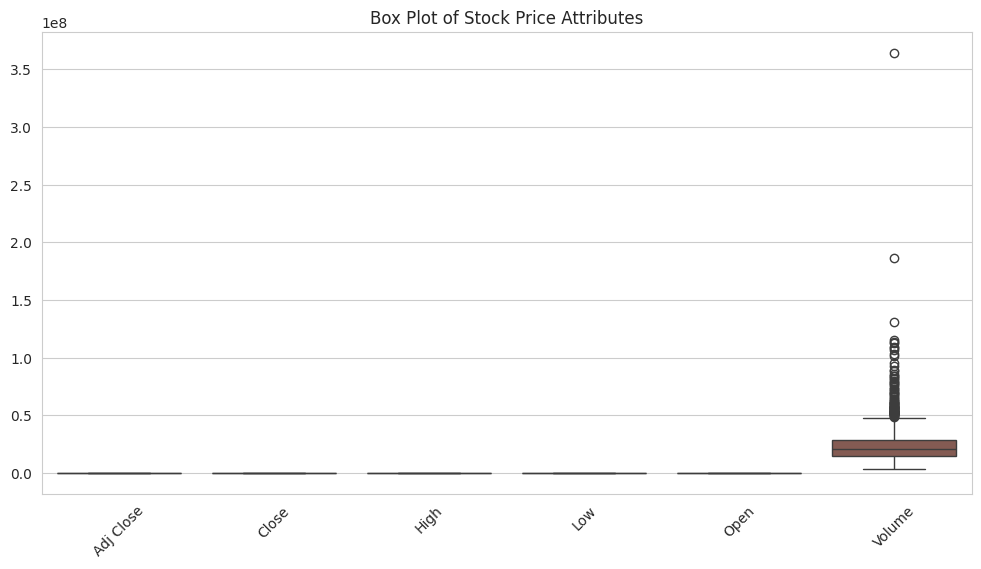

In [5]:
#Box plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Box Plot of Stock Price Attributes")
plt.show()

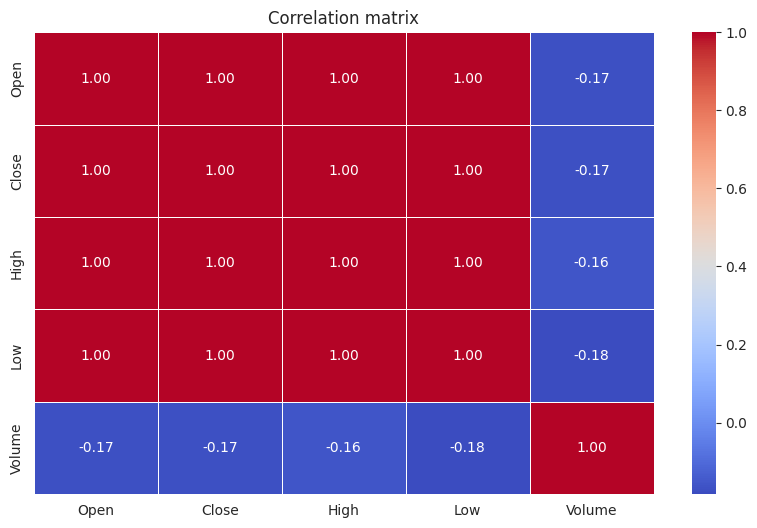

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_df=df[['Open','Close','High','Low','Volume']]
corr_matrix=corr_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

In [7]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
mpf.plot(df_zoomed[['Open', 'High', 'Low', 'Close', 'Volume']],
         type='candle', style='charles', volume=True,
         title='Uber Stock - Larger View',
         figsize=(14, 8))


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


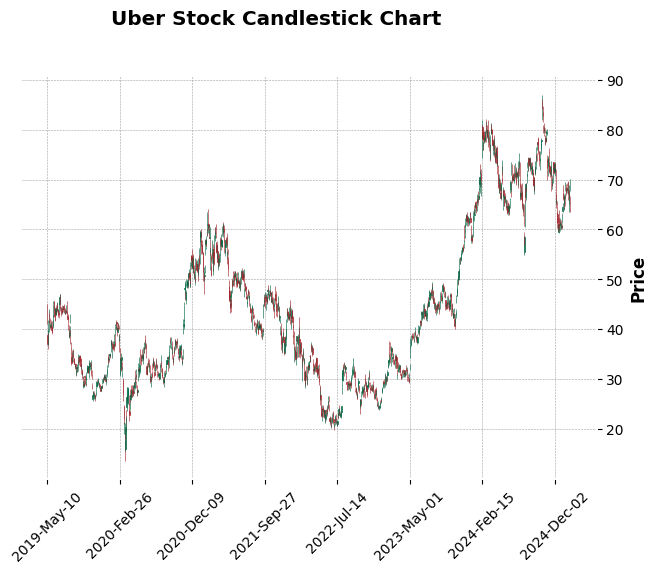

In [10]:
# Candlestick Plot
import pandas as pd
import mplfinance as mpf

# Load and clean data
df = pd.read_csv("uber_stock_data.csv")
df.columns = df.columns.str.strip()  # Remove extra spaces
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Candlestick plot without volume
mpf.plot(df[['Open', 'High', 'Low', 'Close']],
         type='candle', style='charles',
         title='Uber Stock Candlestick Chart')

# Restore Date as a column
df.reset_index(inplace=True)


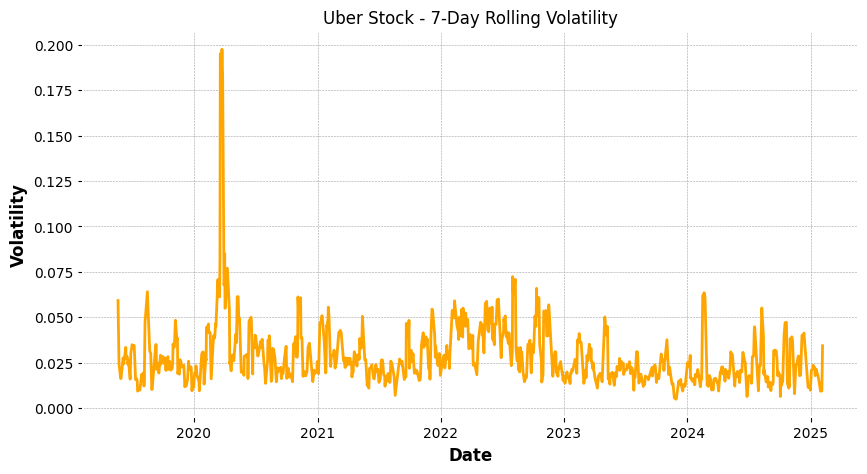

In [11]:
# Calculate daily returns and 7-day rolling volatility
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=7).std()

# Volatility plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Volatility'], color='orange')
plt.title("Uber Stock - 7-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()


In [12]:
#Interactive Candlestick Plot using plotly
import plotly.graph_objects as go

# Interactive candlestick plot
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
fig.update_layout(title='Uber Stock Interactive Candlestick Chart (Plotly)',
                  xaxis_title='Date', yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)
fig.show()


In [13]:
#Stionary check
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Load and prepare data
df = pd.read_csv("uber_stock_data.csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])

# We'll test the 'Close' price
close_series = df['Close']

# ADF Test
result = adfuller(close_series)

# Print test results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {result[0]}")
print(f"p-value            : {result[1]}")
print(f"# Lags Used        : {result[2]}")
print(f"# Observations     : {result[3]}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

# Interpretation
if result[1] <= 0.05:
    print("\n✅ The series is likely stationary (reject null hypothesis).")
else:
    print("\n❌ The series is likely non-stationary (fail to reject null).")


Augmented Dickey-Fuller Test Results:
ADF Statistic      : -1.3698026309450633
p-value            : 0.5966644763753303
# Lags Used        : 0
# Observations     : 1443
Critical Value (1%): -3.434889827343955
Critical Value (5%): -2.863545026607168
Critical Value (10%): -2.5678374612882515

❌ The series is likely non-stationary (fail to reject null).


In [14]:
# First-order differencing
df['Close_diff'] = df['Close'].diff()

# Drop the first NaN value
df_diff = df.dropna(subset=['Close_diff'])

# ADF test on the differenced series
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_diff['Close_diff'])

print("ADF Test on Differenced Series:")
print(f"ADF Statistic      : {result[0]}")
print(f"p-value            : {result[1]}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

if result[1] <= 0.05:
    print("\n✅ The differenced series is stationary.")
else:
    print("\n❌ The differenced series is still non-stationary.")


ADF Test on Differenced Series:
ADF Statistic      : -38.32264773979822
p-value            : 0.0
Critical Value (1%): -3.4348929812602784
Critical Value (5%): -2.863546418485167
Critical Value (10%): -2.5678382024888378

✅ The differenced series is stationary.


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 0.0521 - val_loss: 0.0118
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0021 - val_loss: 0.0060
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0016 - val_l

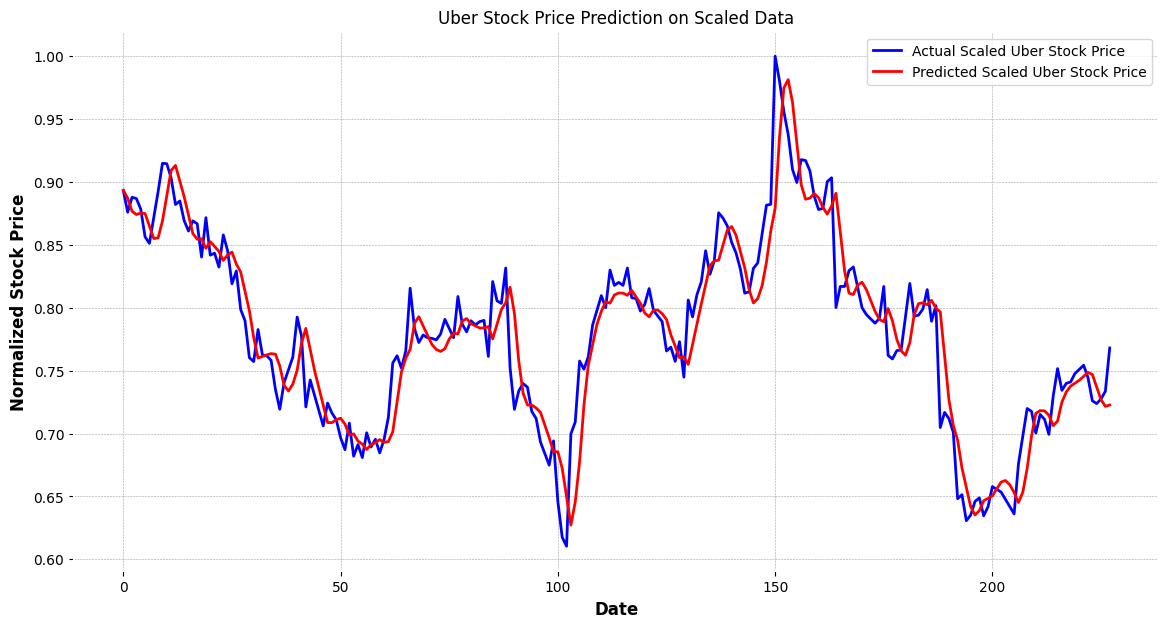

LSTM model saved as 'lstm_model.h5'


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'df' is your dataframe and has the 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use 'Close' price for the prediction
data = df[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create data in sequence format for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model with dropout regularization
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Predicting on the test data
predicted_stock_price = model.predict(X_test)

# Calculate evaluation metrics directly on scaled data
mae_scaled = mean_absolute_error(y_test, predicted_stock_price)
rmse_scaled = np.sqrt(mean_squared_error(y_test, predicted_stock_price))
r2_scaled = r2_score(y_test, predicted_stock_price)

print(f"Scaled MAE (Mean Absolute Error): {mae_scaled:.2f}")
print(f"Scaled RMSE (Root Mean Squared Error): {rmse_scaled:.2f}")
print(f"Scaled R-squared (R² Score): {r2_scaled:.4f}")

# Plot the results directly in scaled form
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual Scaled Uber Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Scaled Uber Stock Price')
plt.title('Uber Stock Price Prediction on Scaled Data')
plt.xlabel('Date')
plt.ylabel('Normalized Stock Price')
plt.legend()
plt.show()

# Save the trained LSTM model
model.save('lstm_model.h5')
print("LSTM model saved as 'lstm_model.h5'")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 0.0491 - val_loss: 0.0201
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0015 - val_loss: 9.7771e-04
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0016 - val_loss: 9.1931e-04
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0016 - val_loss: 9.2072e-04
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Scaled MAE (Mean Absolute Error): 0.0200
Scaled RMSE (Root Mean Squared Error): 0.0280
Scaled R-squared (R² Score): 0.8794


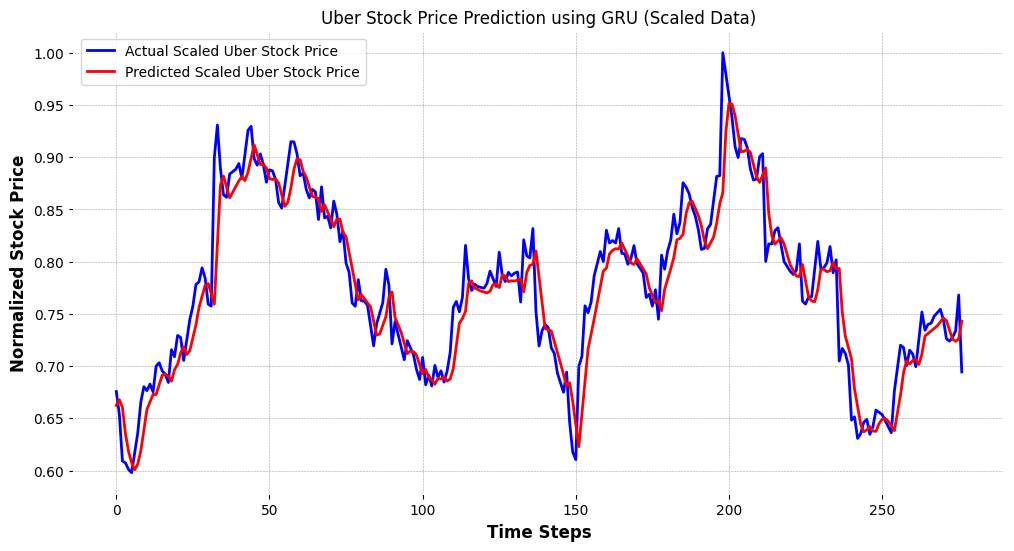

GRU model saved as 'gru_model.h5'


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]
df = df.set_index('Date')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create a dataset with look-back period (e.g., 60 days)
look_back = 60
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape X to be 3D [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the GRU model
model = Sequential()

# Add GRU layers
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
predictions = model.predict(X_test)

# Calculate performance metrics directly on scaled data
mae_scaled = mean_absolute_error(y_test, predictions)
rmse_scaled = np.sqrt(mean_squared_error(y_test, predictions))
r2_scaled = r2_score(y_test, predictions)

print(f'Scaled MAE (Mean Absolute Error): {mae_scaled:.4f}')
print(f'Scaled RMSE (Root Mean Squared Error): {rmse_scaled:.4f}')
print(f'Scaled R-squared (R² Score): {r2_scaled:.4f}')

# Plot the results directly in scaled form
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Scaled Uber Stock Price')
plt.plot(predictions, color='red', label='Predicted Scaled Uber Stock Price')
plt.title('Uber Stock Price Prediction using GRU (Scaled Data)')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Stock Price')
plt.legend()
plt.show()

# Save the trained GRU model
model.save('gru_model.h5')
print("GRU model saved as 'gru_model.h5'")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0526 - val_loss: 0.0483 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0096 - val_loss: 0.0119 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0063 - val_loss: 0.0066 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 0.0049 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0043 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0038 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0034 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.0031 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0029 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 10/100

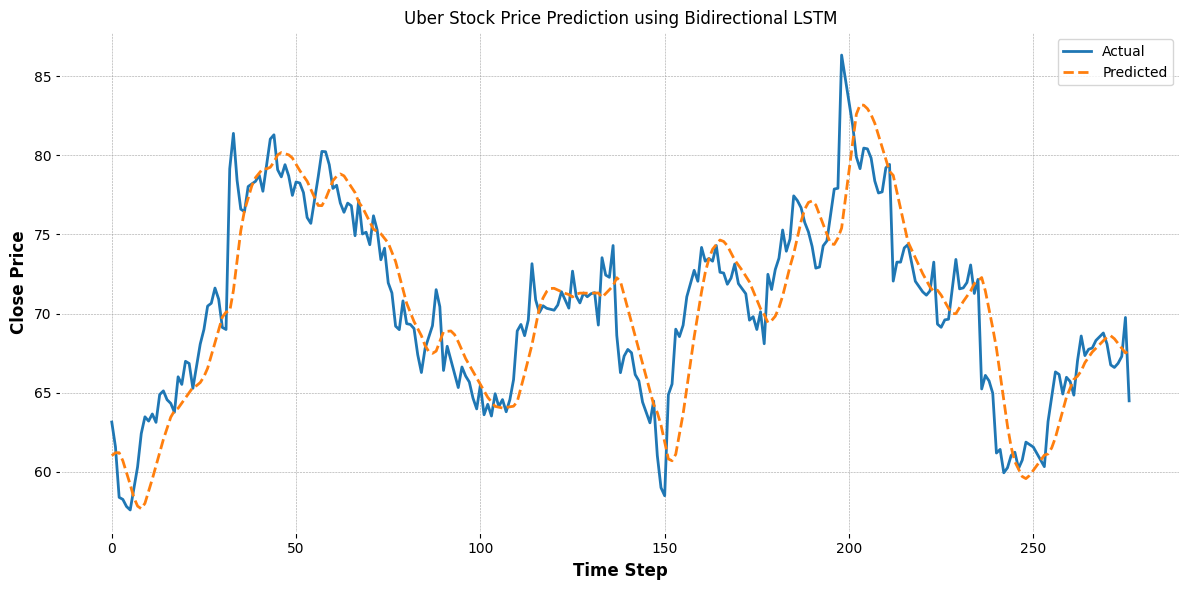

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -----------------------------------------
# Load and prepare data
# -----------------------------------------
df = pd.read_csv("uber_stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']]

# Normalize the Close prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# -----------------------------------------
# Create sequences
# -----------------------------------------
look_back = 60

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, look_back)

# Reshape for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# -----------------------------------------
# Split into train and test sets (no shuffle)
# -----------------------------------------
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# -----------------------------------------
# Build Bidirectional LSTM model
# -----------------------------------------
def build_model(units=50, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=units, activation='tanh', return_sequences=False, input_shape=(look_back, 1),
                                 kernel_regularizer=tf.keras.regularizers.l2(0.001))))
    model.add(Dropout(dropout_rate))  # Dropout layer to prevent overfitting
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# -----------------------------------------
# Learning Rate Scheduler and Early Stopping
# -----------------------------------------
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# -----------------------------------------
# Train model
# -----------------------------------------
# You can experiment with different units, learning rate, and batch size
model = build_model(units=100, learning_rate=0.001, dropout_rate=0.2)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),
                    verbose=1, callbacks=[early_stopping, lr_scheduler])

# -----------------------------------------
# Predict and inverse scale
# -----------------------------------------
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# -----------------------------------------
# Evaluate performance
# -----------------------------------------
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Evaluation Results:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# -----------------------------------------
# Plot results
# -----------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title("Uber Stock Price Prediction using Bidirectional LSTM")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 357ms/step - loss: 0.0433 - val_loss: 0.0495 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - loss: 0.0088 - val_loss: 0.0119 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0063 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - loss: 0.0047 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 0.0039 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0033 - val_loss: 0.0043 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0031 - val_loss: 0.0041 - learning_rate: 0.0010
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - loss: 0.0027 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 0.0028 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 10/100

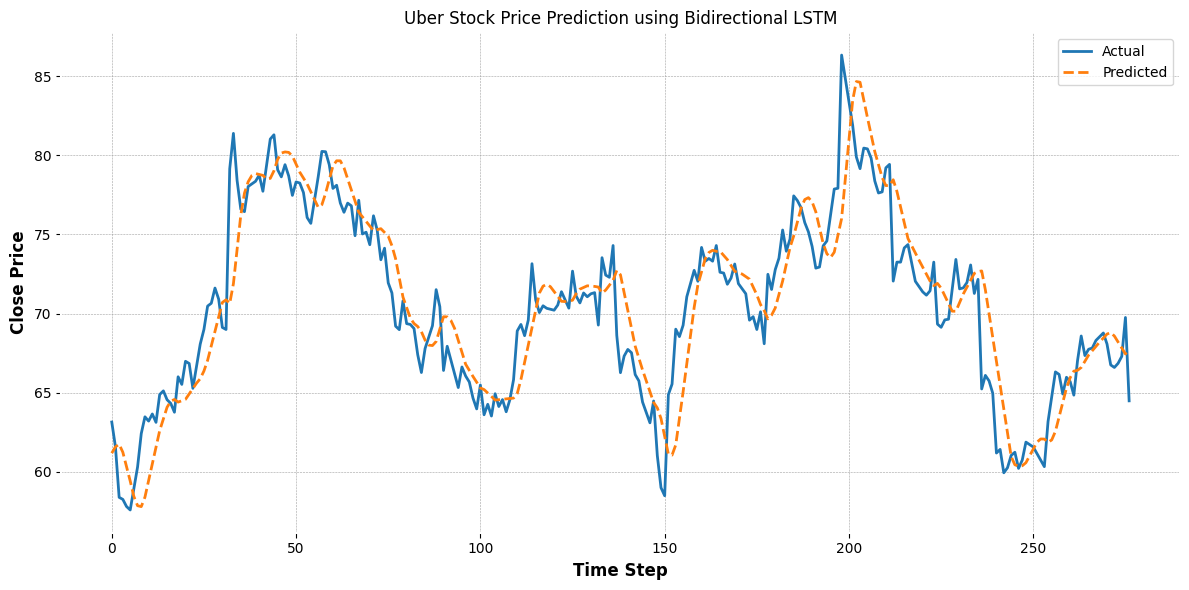

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -----------------------------------------
# Load and prepare data
# -----------------------------------------
df = pd.read_csv("uber_stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']]

# Normalize the Close prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# -----------------------------------------
# Create sequences
# -----------------------------------------
look_back = 60

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, look_back)

# Reshape for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# -----------------------------------------
# Split into train and test sets (no shuffle)
# -----------------------------------------
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# -----------------------------------------
# Build Bidirectional LSTM model
# -----------------------------------------
def build_model(units=50, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=units, activation='tanh', return_sequences=False, input_shape=(look_back, 1),
                                 kernel_regularizer=tf.keras.regularizers.l2(0.001))))
    model.add(Dropout(dropout_rate))  # Dropout layer to prevent overfitting
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# -----------------------------------------
# Learning Rate Scheduler and Early Stopping
# -----------------------------------------
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# -----------------------------------------
# Train model
# -----------------------------------------
# You can experiment with different units, learning rate, and batch size
model = build_model(units=100, learning_rate=0.001, dropout_rate=0.2)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),
                    verbose=1, callbacks=[early_stopping, lr_scheduler])

# -----------------------------------------
# Predict and inverse scale
# -----------------------------------------
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# -----------------------------------------
# Evaluate performance
# -----------------------------------------
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Evaluation Results:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# -----------------------------------------
# Plot results
# -----------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title("Uber Stock Price Prediction using Bidirectional LSTM")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2609 - val_loss: 0.0733
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0212 - val_loss: 0.0281
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - val_loss: 0.0267
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - val_loss: 0.0257
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - val_loss: 0.0215
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - val_loss: 0.0185
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - val_loss: 0.0184
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - val_loss: 0.0180
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0109 - val_loss: 0.0147
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - val_loss: 0.0136
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - val_loss: 0.0125
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

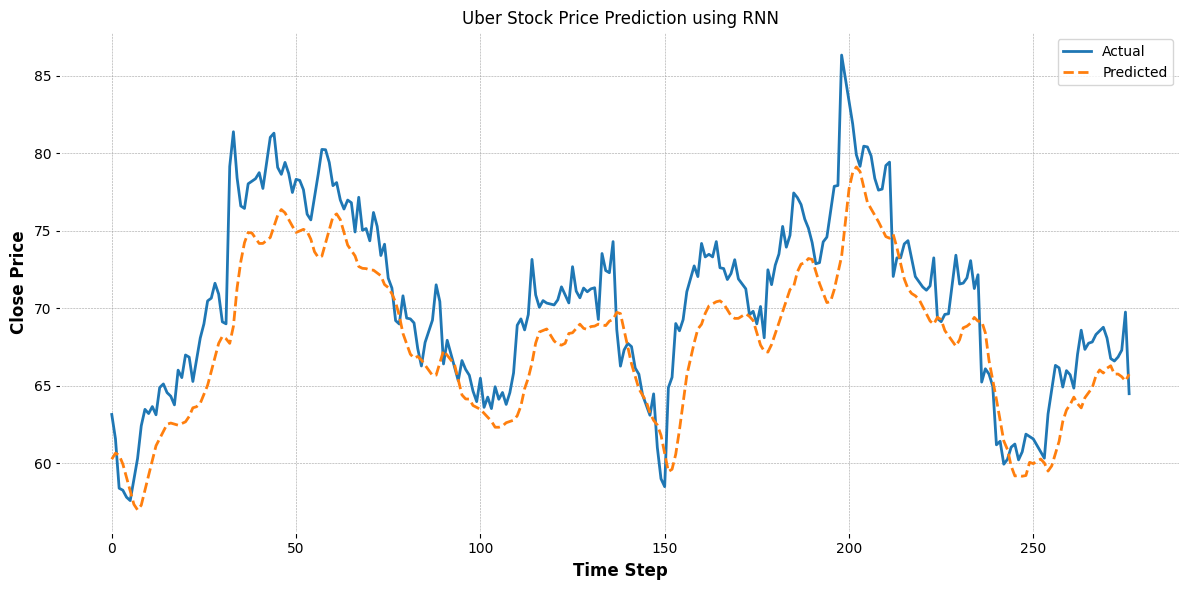

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.regularizers import l2

# -----------------------------------------
# Load and prepare data
# -----------------------------------------
df = pd.read_csv("uber_stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']]

# Normalize the Close prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# -----------------------------------------
# Create sequences
# -----------------------------------------
look_back = 60

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, look_back)

# Reshape for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# -----------------------------------------
# Split into train and test sets (no shuffle)
# -----------------------------------------
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# -----------------------------------------
# Build RNN model with L2 Regularization
# -----------------------------------------
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(look_back, 1),
                    kernel_regularizer=l2(0.01)))  # L2 regularization added here
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# -----------------------------------------
# Train model
# -----------------------------------------
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# -----------------------------------------
# Predict and inverse scale
# -----------------------------------------
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# -----------------------------------------
# Evaluate performance
# -----------------------------------------
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Evaluation Results:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# -----------------------------------------
# Plot results
# -----------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title("Uber Stock Price Prediction using RNN")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0639 - val_loss: 0.0223 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0094 - val_loss: 0.0075 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0060 - val_loss: 0.0058 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0051 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045 - val_loss: 0.0042 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0042 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0037 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0038 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 10/100
18/18 ━━━

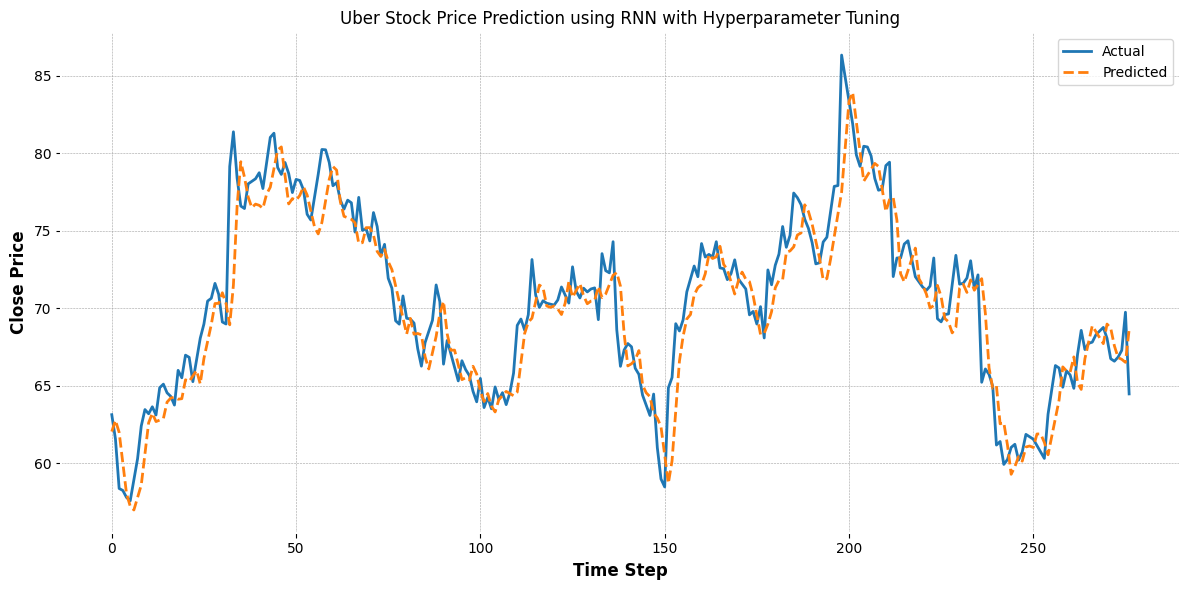

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -----------------------------------------
# Load and prepare data
# -----------------------------------------
df = pd.read_csv("uber_stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']]

# Normalize the Close prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# -----------------------------------------
# Create sequences
# -----------------------------------------
look_back = 60

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, look_back)

# Reshape for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# -----------------------------------------
# Split into train and test sets (no shuffle)
# -----------------------------------------
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# -----------------------------------------
# Build RNN model with hyperparameter tuning
# -----------------------------------------
def build_model(units=50, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation='tanh', return_sequences=False, input_shape=(look_back, 1),
                        kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(dropout_rate))  # Dropout layer to prevent overfitting
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# -----------------------------------------
# Learning Rate Scheduler and Early Stopping
# -----------------------------------------
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# -----------------------------------------
# Train model
# -----------------------------------------
# You can experiment with different units, learning rate, and batch size
model = build_model(units=100, learning_rate=0.001, dropout_rate=0.2)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),
                    verbose=1, callbacks=[early_stopping, lr_scheduler])

# -----------------------------------------
# Predict and inverse scale
# -----------------------------------------
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# -----------------------------------------
# Evaluate performance
# -----------------------------------------
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Evaluation Results:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# -----------------------------------------
# Plot results
# -----------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title("Uber Stock Price Prediction using RNN with Hyperparameter Tuning")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


Evaluation Results (CatBoost):
MAE  : 14.8001
RMSE : 15.9662
R²   : -6.6536


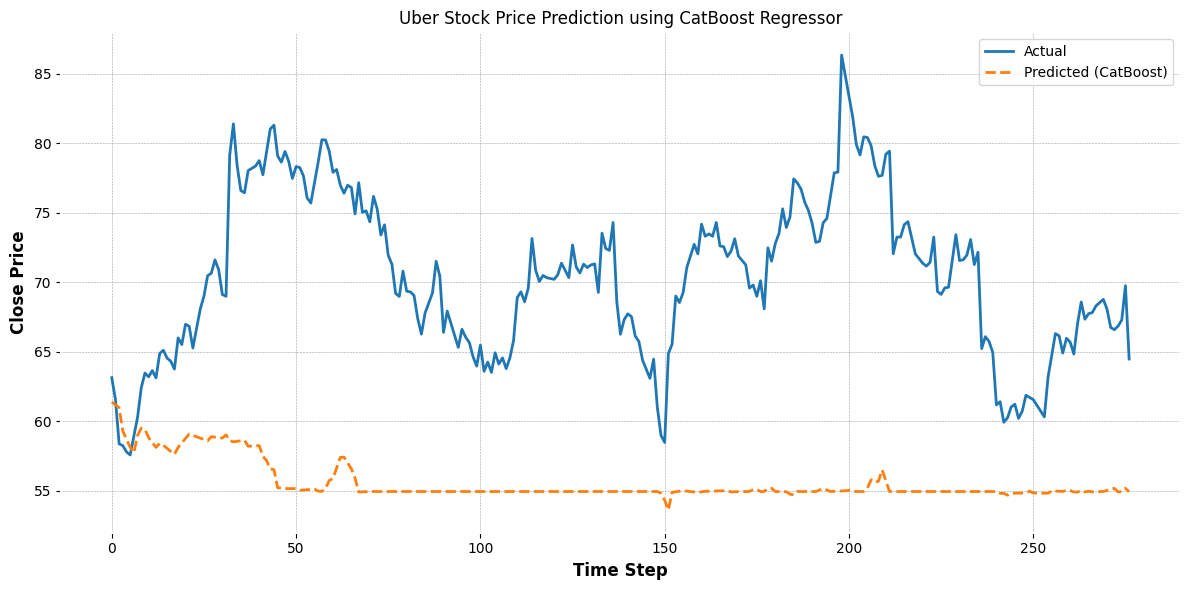

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

# -----------------------------------------
# Load and prepare data
# -----------------------------------------
df = pd.read_csv("uber_stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']]

# Normalize the Close prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# -----------------------------------------
# Create sequences
# -----------------------------------------
look_back = 60

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, look_back)

# Flatten for CatBoost (does not need 3D input)
X_flat = X.reshape((X.shape[0], X.shape[1]))

# -----------------------------------------
# Split into train and test sets
# -----------------------------------------
split_index = int(len(X_flat) * 0.8)
X_train, X_test = X_flat[:split_index], X_flat[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# -----------------------------------------
# Train CatBoost Regressor
# -----------------------------------------
catboost_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=0,  # Set to 100 to see logs
    random_seed=42
)
catboost_model.fit(X_train, y_train)

# -----------------------------------------
# Predict and inverse scale
# -----------------------------------------
y_pred_scaled = catboost_model.predict(X_test).reshape(-1, 1)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# -----------------------------------------
# Evaluate performance
# -----------------------------------------
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Evaluation Results (CatBoost):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# -----------------------------------------
# Plot results
# -----------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted (CatBoost)', linestyle='--')
plt.title("Uber Stock Price Prediction using CatBoost Regressor")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Predicted Closing Prices for the next 10 days:
Day 1: 67.67
Day 2: 66.07
Day 3: 65.65
Day 4: 66.10
Day 5: 64.75
Day 6: 65.57
Day 7: 64.95
Day 8: 64.88
Day 9: 64.97
Day 10: 64.51


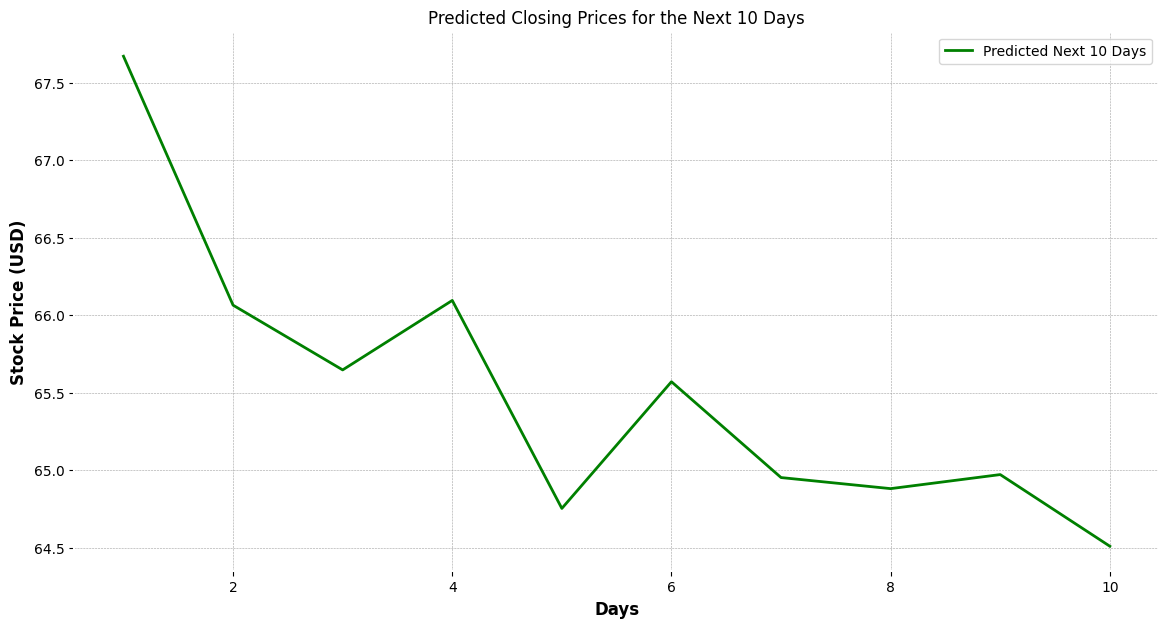

In [32]:
# Predicting the next 10 days closing prices
def predict_future_days(model, last_sequence, days=10):
    predictions = []
    current_sequence = last_sequence

    for _ in range(days):
        # Predict the next day
        predicted_price = model.predict(current_sequence.reshape(1, time_step, 1))

        # Append the prediction to the list
        predictions.append(predicted_price[0, 0])

        # Update the sequence for the next prediction
        current_sequence = np.append(current_sequence[1:], predicted_price[0, 0])

    return predictions

# Get the last 60 data points from the test set as input for prediction
last_sequence = test_data[-time_step:]

# Predict the next 10 days' prices
predicted_10_days = predict_future_days(model, last_sequence)

# Rescale the predicted data back to the original scale
predicted_10_days_rescaled = scaler.inverse_transform(np.array(predicted_10_days).reshape(-1, 1))

# Print the predicted closing prices for the next 10 days
print("Predicted Closing Prices for the next 10 days:")
for i, price in enumerate(predicted_10_days_rescaled.flatten(), 1):
    print(f"Day {i}: {price:.2f}")

# Plotting the predicted prices
plt.figure(figsize=(14, 7))
plt.plot(range(1, 11), predicted_10_days_rescaled.flatten(), color='green', label='Predicted Next 10 Days')
plt.title('Predicted Closing Prices for the Next 10 Days')
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Closing Prices for the next 10 days:
Day 1: 68.63
Day 2: 68.96
Day 3: 68.52
Day 4: 68.06
Day 5: 68.37
Day 6: 67.36
Day 7: 67.65
Day 8: 67.57
Day 9: 66.86
Day 10: 67.10


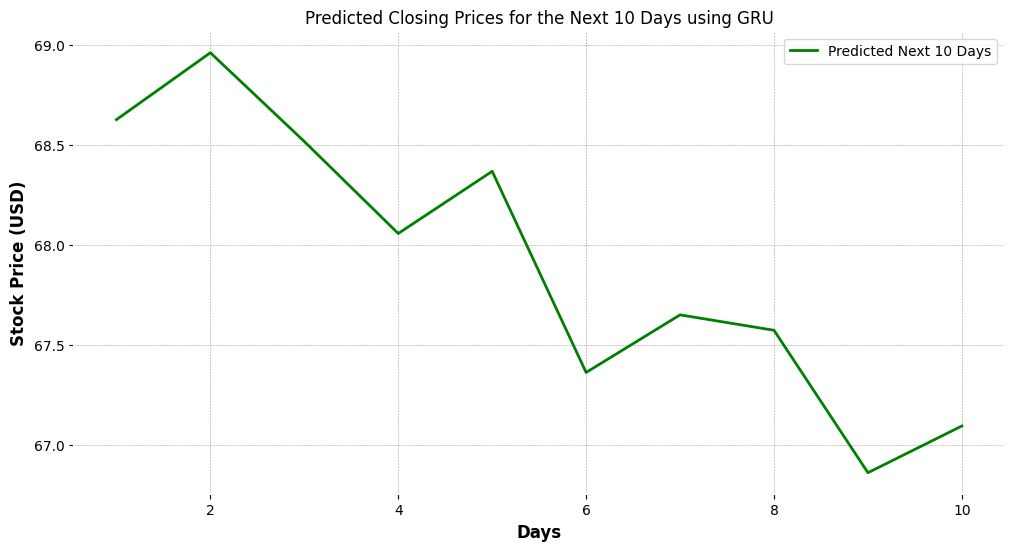

In [33]:
# Function to predict the next 10 days using the trained GRU model
def predict_future_days_gru(model, last_sequence, days=10):
    predictions = []
    current_sequence = last_sequence

    for _ in range(days):
        # Predict the next day
        predicted_price = model.predict(current_sequence.reshape(1, look_back, 1))

        # Append the prediction to the list
        predictions.append(predicted_price[0, 0])

        # Update the sequence for the next prediction
        current_sequence = np.append(current_sequence[1:], predicted_price[0, 0])

    return predictions

# Get the last `look_back` number of data points from the test set as input for prediction
last_sequence = X_test[-1]  # Last sequence from the test data

# Predict the next 10 days' prices
predicted_10_days = predict_future_days_gru(model, last_sequence)

# Rescale the predicted data back to the original scale (from 0-1 to actual price)
predicted_10_days_rescaled = scaler.inverse_transform(np.array(predicted_10_days).reshape(-1, 1))

# Print the predicted closing prices for the next 10 days
print("Predicted Closing Prices for the next 10 days:")
for i, price in enumerate(predicted_10_days_rescaled.flatten(), 1):
    print(f"Day {i}: {price:.2f}")

# Plotting the predicted prices for the next 10 days
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), predicted_10_days_rescaled.flatten(), color='green', label='Predicted Next 10 Days')
plt.title('Predicted Closing Prices for the Next 10 Days using GRU')
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()
